# Time Series Classification: Social on left or right?

The goal is to predict the side the social image is on based on the raw timeseries data.

## Import modules and set path.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


PATH='/Users/nickhedger/Documents'

## Load in files.

Here I load the timeseries and labels into a pandas dataframe

In [20]:
def load_data(PATH,FILE):
	csvpath=os.path.join(PATH,FILE)
	return pd.read_csv(csvpath)


TIMESERIES=load_data(PATH,'TIMESERIES_S_CLEAN.csv') # The full timeseries data.
SIDELAB=load_data(PATH,'SIDELABELS_CLEAN.csv') # The labels corresponding to the location of the social image.

## Review data structure

In [21]:
TIMESERIES.head()

,Unnamed: 0,id,time,X,Y,ps
0,1,1,1,762.3,639.5,1
1,2,1,2,762.3,639.5,1
2,3,1,3,762.3,639.5,1
3,4,1,4,762.3,639.5,1
4,5,1,5,762.3,639.5,1


In [22]:
len(np.unique(TIMESERIES["id"]))

2916

In [23]:
SIDELAB.head()

,Unnamed: 0,side
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [64]:
SIDELAB.shape

(2916, 1)

The timeseries data has the following structure: There is the id (timeseries number) a timestamp and a corresponding X and Y value for each timestamp.

There are 500 X and Y values per timeseries. There are 2916 timeseries, each of which has a corresponding label in the SIDELAB dataframe (1= social is left, 2 =social is right).

Plot an example timeseries instance.

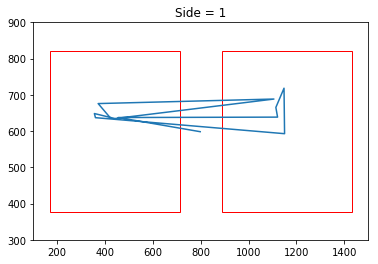

In [24]:
# Plot a timeseries and add some bells and whistles. Plot where the stimuli are and a title indicating whether
# it was a scrambled or intact trial.
import matplotlib.patches as patches
SIDELAB=SIDELAB.drop('Unnamed: 0',1)
def tsplot(FRAME,id):
    fig1, ax =plt.subplots(1)
    instance=FRAME[(FRAME["id"]==id)]
    plt.plot(instance['X'],instance['Y'])
    plt.axis([100,1500,300,900])
    rect=patches.Rectangle((168,378),544,444,facecolor='none',edgecolor='r') # Plot the grid area
    rect2=patches.Rectangle((888,378),544,444,facecolor='none',edgecolor='r')
    ax.add_patch(rect)
    ax.add_patch(rect2)
    num=SIDELAB.iloc[id-1,0] # Reference the timeseries with the label. 
    lab="Side = %d" % (num)
    plt.title(lab)
    plt.show()
    
x=tsplot(TIMESERIES,100)

## Classifcation of social left v social right trials.

Now we get the labels into a 1D format.

In [25]:
# Drop columns not required.
TIMESERIES=TIMESERIES.drop('Unnamed: 0',1)
TIMESERIES=TIMESERIES.drop('ps',1)

In [26]:
LABELS=SIDELAB
LABELSPREP=pd.DataFrame.as_matrix(LABELS)
LABELSPREP=np.squeeze(LABELSPREP)
LABELSPREP.shape

(2916,)

Now the data are all in the correct format, import the tsfresh module and ask it to engineer some features. The  [following features are calculated](http://tsfresh.readthedocs.io/en/latest/text/list_of_features.html). This takes hours....

In [27]:
from tsfresh import extract_relevant_features
features_filtered_direct = extract_relevant_features(TIMESERIES, LABELSPREP,
                                                     column_id='id', column_sort='time')

/Users/nickhedger/anaconda2/envs/env/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Feature Extraction: 10it [1:35:51, 575.19s/it]                       
 'X__friedrich_coefficients__m_3__r_30__coeff_1'
 'X__friedrich_coefficients__m_3__r_30__coeff_2'
 'X__friedrich_coefficients__m_3__r_30__coeff_3'
 'X__max_langevin_fixed_point__m_3__r_30'
 'Y__friedrich_coefficients__m_3__r_30__coeff_0'
 'Y__friedrich_coefficients__m_3__r_30__coeff_1'
 'Y__friedrich_coefficients__m_3__r_30__coeff_2'
 'Y__friedrich_coefficients__m_3__r_30__coeff_3'
 'Y__max_langevin_fixed_point__m_3__r_30'] did not have any finite values. Filling with zeros.


In this next section I dumped the data into a pickle (commented out). Here I can also load the pickle object.   

In [28]:
# Dump the data. 
#import dill                            
#filename = 'T_S_dump_side_clean.pkl'
#dill.dump_session(os.path.join(PATH,filename))

Order the features by their relevance and show the 10 most relevant

In [29]:
templab=pd.Series(LABELSPREP,index=np.unique(TIMESERIES["id"]))
templab.head()
templab.unique
from tsfresh.feature_selection.relevance import calculate_relevance_table
sigtable=calculate_relevance_table(X=features_filtered_direct,y=templab)

In [30]:
sigtable.head(n=10)

,feature,type,p_value,relevant
feature,,,,
"X__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","X__agg_linear_trend__f_agg_""mean""__chunk_len_5...",real,9.273947e-54,True
"X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","X__agg_linear_trend__f_agg_""max""__chunk_len_10...",real,1.595291e-50,True
"X__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","X__agg_linear_trend__f_agg_""mean""__chunk_len_1...",real,1.244672e-49,True
"X__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","X__agg_linear_trend__f_agg_""max""__chunk_len_5_...",real,1.865709e-49,True
"X__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","X__agg_linear_trend__f_agg_""max""__chunk_len_50...",real,2.093674e-49,True
"X__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","X__agg_linear_trend__f_agg_""mean""__chunk_len_5...",real,3.868391e-49,True
X__c3__lag_1,X__c3__lag_1,real,6.366563e-49,True
"X__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","X__agg_linear_trend__f_agg_""min""__chunk_len_5_...",real,6.684427e-49,True
X__c3__lag_2,X__c3__lag_2,real,7.292170e-49,True


Its hard to get a grasp of what these features actually are without visualising some trials. Define a function for showing the k trials that represent the highest and lowest of a feature.

In [42]:
def SHOWFEATURE(feature):
    reldim=feature[0]
    fig, ax = plt.subplots(figsize=(20, 20))
    for i in range(4): # Plot the top 4 instances
        for j in range(4):
            ax = plt.subplot2grid((4,4), (i,j))
            if j==0: 
                league=features_filtered_direct.sort_values(by=[feature],ascending=True) # The lowest values
                idt=league.iloc[[i]].index[0] # Get the id
                var=round(league[feature].iloc[i],3) # Get the value of the variable
                instance=TIMESERIES[(TIMESERIES["id"]==idt)] # Get the timeseries corresponding to the ID
                plt.axis([100,1500,300,900])
                rect=patches.Rectangle((168,378),544,444,facecolor='none',edgecolor='r') # Plot the grid area
                rect2=patches.Rectangle((888,378),544,444,facecolor='none',edgecolor='r')
                num=SIDELAB.iloc[idt-1,0] # Reference the timeseries with the label to determine whether it was scrambled or not
                ax.add_patch(rect)
                ax.add_patch(rect2)
                lab="ID= %d, var= %f Side = %d" % (idt,var,num)
                ax.set_title(lab)
                ax.plot(instance['X'],instance['Y'])
            elif j==1:
                league=features_filtered_direct.sort_values(by=[feature],ascending=False) # The highest values
                idt=league.iloc[[i]].index[0] # Get the id
                var=round(league[feature].iloc[i],3) # Get the value of the variable
                instance=TIMESERIES[(TIMESERIES["id"]==idt)] # Get the timeseries corresponding to the ID
                plt.axis([100,1500,300,900])
                rect=patches.Rectangle((168,378),544,444,facecolor='none',edgecolor='r') # Plot the grid area
                rect2=patches.Rectangle((888,378),544,444,facecolor='none',edgecolor='r')
                num=SIDELAB.iloc[idt-1,0] # Reference the timeseries with the label to determine whether it was scrambled or not
                ax.add_patch(rect)
                ax.add_patch(rect2)
                lab="ID= %d, var= %f Side = %d" % (idt,var,num)
                ax.set_title(lab)
                ax.plot(instance['X'],instance['Y'])
            elif j==2:
                league=features_filtered_direct.sort_values(by=[feature],ascending=True) # The highest values
                idt=league.iloc[[i]].index[0] # Get the id
                var=round(league[feature].iloc[i],3) # Get the value of the variable
                instance=TIMESERIES[(TIMESERIES["id"]==idt)] # Get the timeseries corresponding to the ID
                num=SIDELAB.iloc[idt-1,0] # Reference the timeseries with the label to determine whether it was scrambled or not
                lab="ID= %d, var= %f Side = %d" % (idt,var,num)
                ax.set_title(lab)
                ax.plot(instance[reldim])
                ax.set_ylim(TIMESERIES[reldim].min(), TIMESERIES[reldim].max())
            elif j==3:
                league=features_filtered_direct.sort_values(by=[feature],ascending=False) # The highest values
                idt=league.iloc[[i]].index[0] # Get the id
                var=round(league[feature].iloc[i],3) # Get the value of the variable
                instance=TIMESERIES[(TIMESERIES["id"]==idt)] # Get the timeseries corresponding to the ID
                num=SIDELAB.iloc[idt-1,0] # Reference the timeseries with the label to determine whether it was scrambled or not
                lab="ID= %d, var= %f Side = %d" % (idt,var,num)
                ax.set_title(lab)
                ax.plot(instance[reldim])
                ax.set_ylim(TIMESERIES[reldim].min(), TIMESERIES[reldim].max())

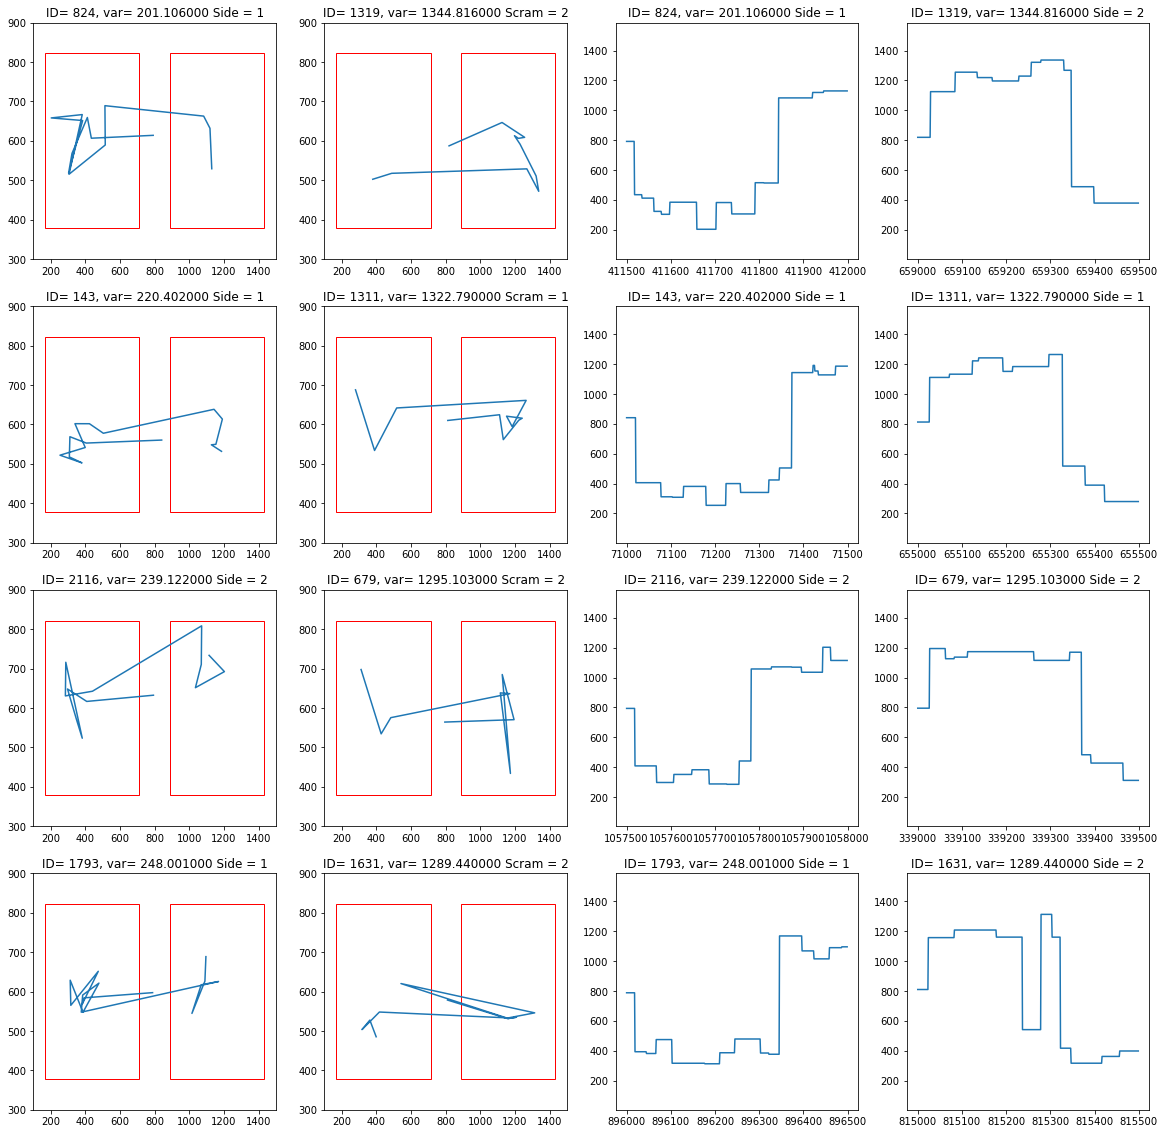

In [34]:
SHOWFEATURE('X__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"')

Now scale the feature matrix.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trans=scaler.fit(features_filtered_direct)
scaled=scaler.transform(features_filtered_direct)

In [34]:
scaled.shape

(2963, 241)

Split the data into a training (80%) and test (20%) set.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(scaled, LABELSPREP, test_size=.2)

Fit a random forest classifier to the training data.

In [37]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier() 
cl.fit(X_train, y_train) # Fit to the training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Perform cross validation and get accuracy scores across folds

In [38]:
scoreCV=cross_val_score(cl,X_train,y_train,cv=10,scoring='accuracy') # Cross validate.

scoreCV

array([ 0.66666667,  0.64102564,  0.60515021,  0.61373391,  0.67381974,
        0.62660944,  0.67381974,  0.6223176 ,  0.69957082,  0.6223176 ])

Also show accuracy at predicting test set.

In [39]:
from sklearn.metrics import classification_report # Show performance at classifying the test data
print(classification_report(y_test, cl.predict(X_test)))

             precision    recall  f1-score   support

          1       0.58      0.69      0.63       284
          2       0.64      0.52      0.58       300

avg / total       0.61      0.60      0.60       584



Take a look at the features that ended up being the most important for the random forest classifier

In [40]:
attributes=list(features_filtered_direct)

sorted(zip(cl.feature_importances_,attributes),reverse=True)

[(0.017569196348694836, 'X__fft_coefficient__coeff_0__attr_"real"'),
 (0.012913882840370533,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20'),
 (0.012342553009341639,
  'X__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"'),
 (0.011669938862606893, 'X__count_above_mean'),
 (0.011646481626682369, 'X__skewness'),
 (0.011287305818490075, 'X__fft_coefficient__coeff_0__attr_"abs"'),
 (0.011270631859590374, 'X__count_below_mean'),
 (0.01125863986494274, 'X__c3__lag_1'),
 (0.010018128908197229,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_20'),
 (0.009822092709248215, 'X__maximum'),
 (0.0097005232445985783,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_4__w_20'),
 (0.0096248615765725902, 'X__quantile__q_0.9'),
 (0.0095823160501172649,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_3__w_20'),
 (0.0092332359910912241,
  'X__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"intercept"'),
 (0.0086998235419911436, 'X__index_mass_quantile__q_0.3

Plot some of the most important features

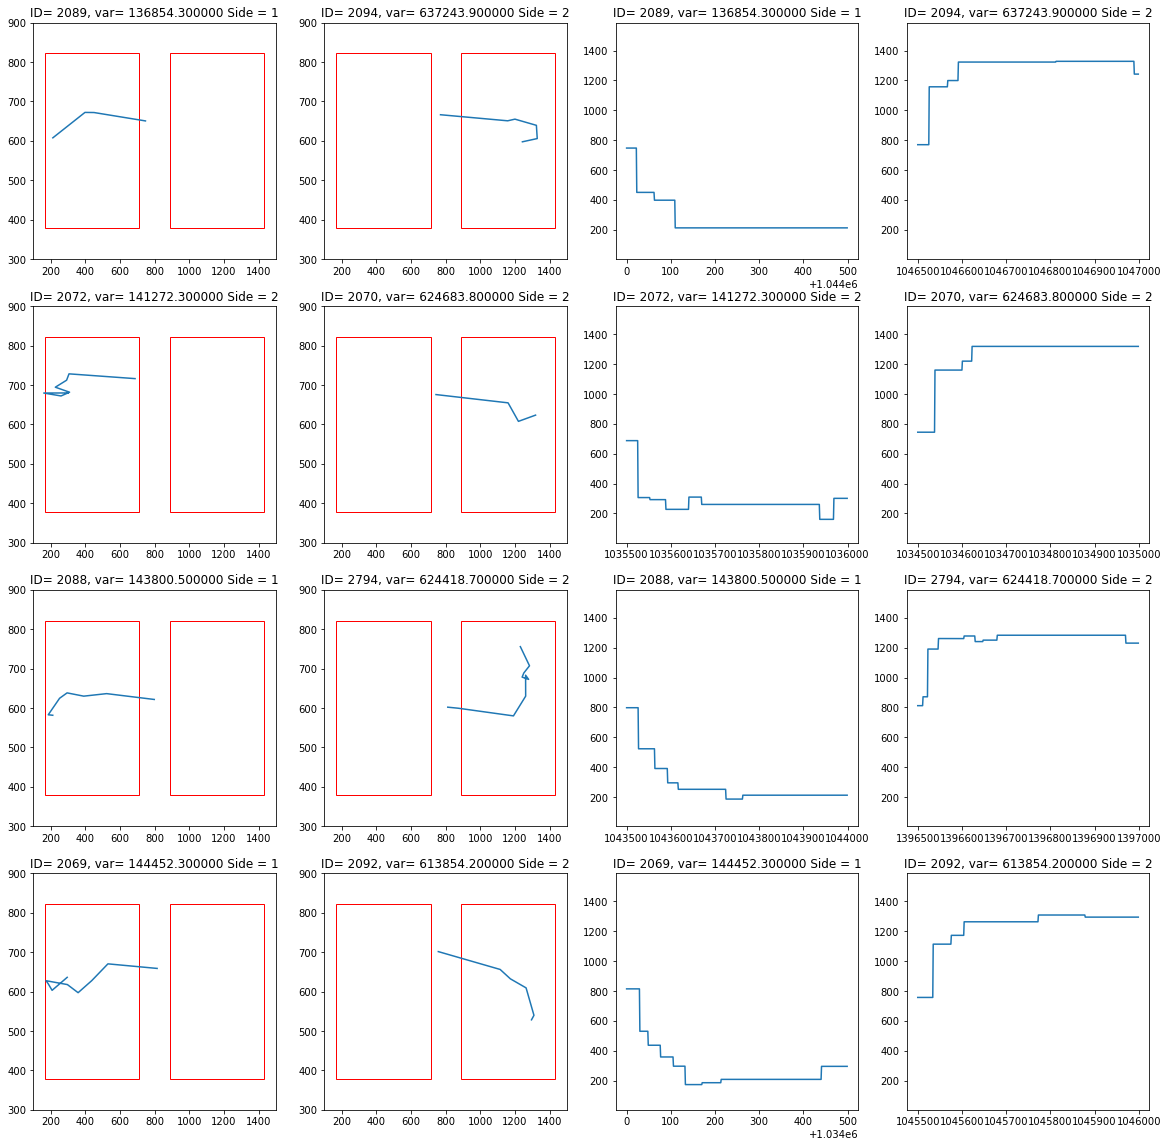

In [66]:
def featureplot(FRAME,LABELS,FEATURE):
    feature=np.column_stack((np.array(FRAME[FEATURE]),np.squeeze(np.array(pd.DataFrame(LABELS)))))
    left=feature[np.where(feature[:,-1] == 1)]
    right=feature[np.where(feature[:,-1] == 2)]
    plt.subplot(1, 2, 1)
    plt.boxplot(left[:,0])
    plt.title('Left')
    ax1=plt.gca()
    ax1.set_ylim(ymin=feature[:,-2].min(), ymax=feature[:,-2].max())
    plt.subplot(1, 2, 2)
    plt.boxplot(right[:,0])
    plt.title('Right')
    ax2=plt.gca()
    ax2.set_ylim(ymin=feature[:,-2].min(), ymax=feature[:,-2].max())


SHOWFEATURE('X__fft_coefficient__coeff_0__attr_"real"')

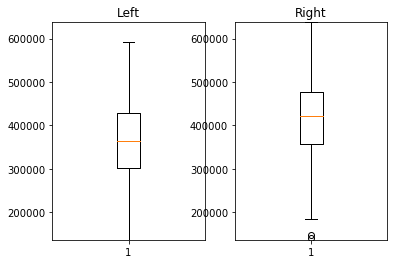

In [67]:
featureplot(features_filtered_direct,LABELS,'X__fft_coefficient__coeff_0__attr_"real"')

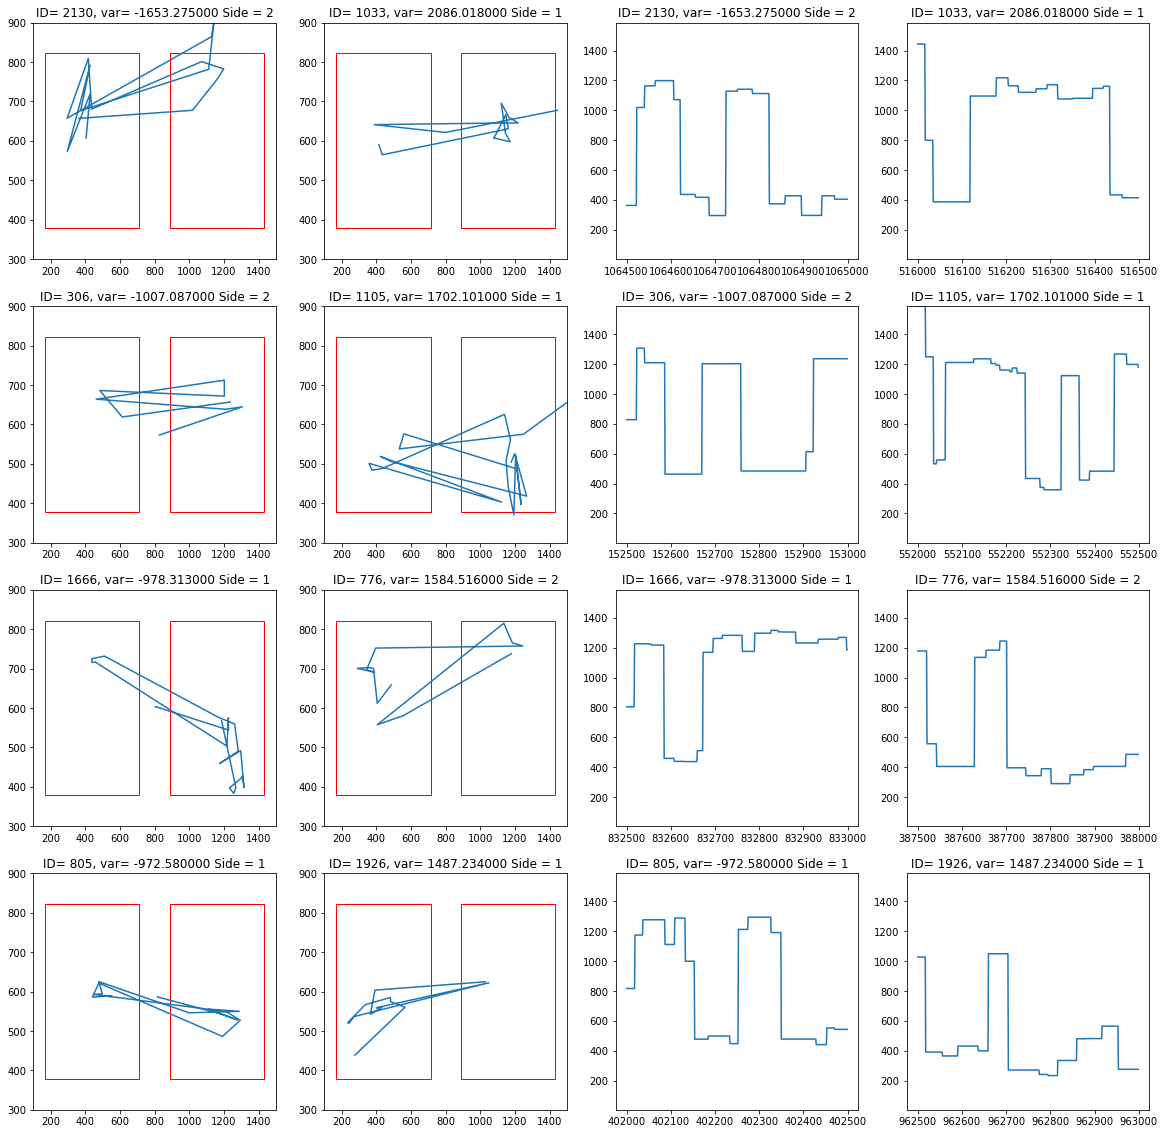

In [54]:
SHOWFEATURE('X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20')

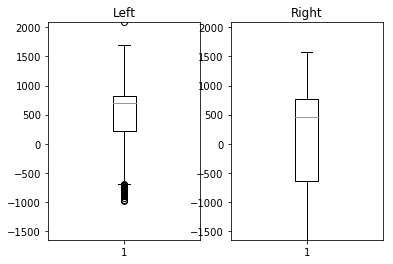

In [70]:
featureplot(features_filtered_direct,LABELS,'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20')

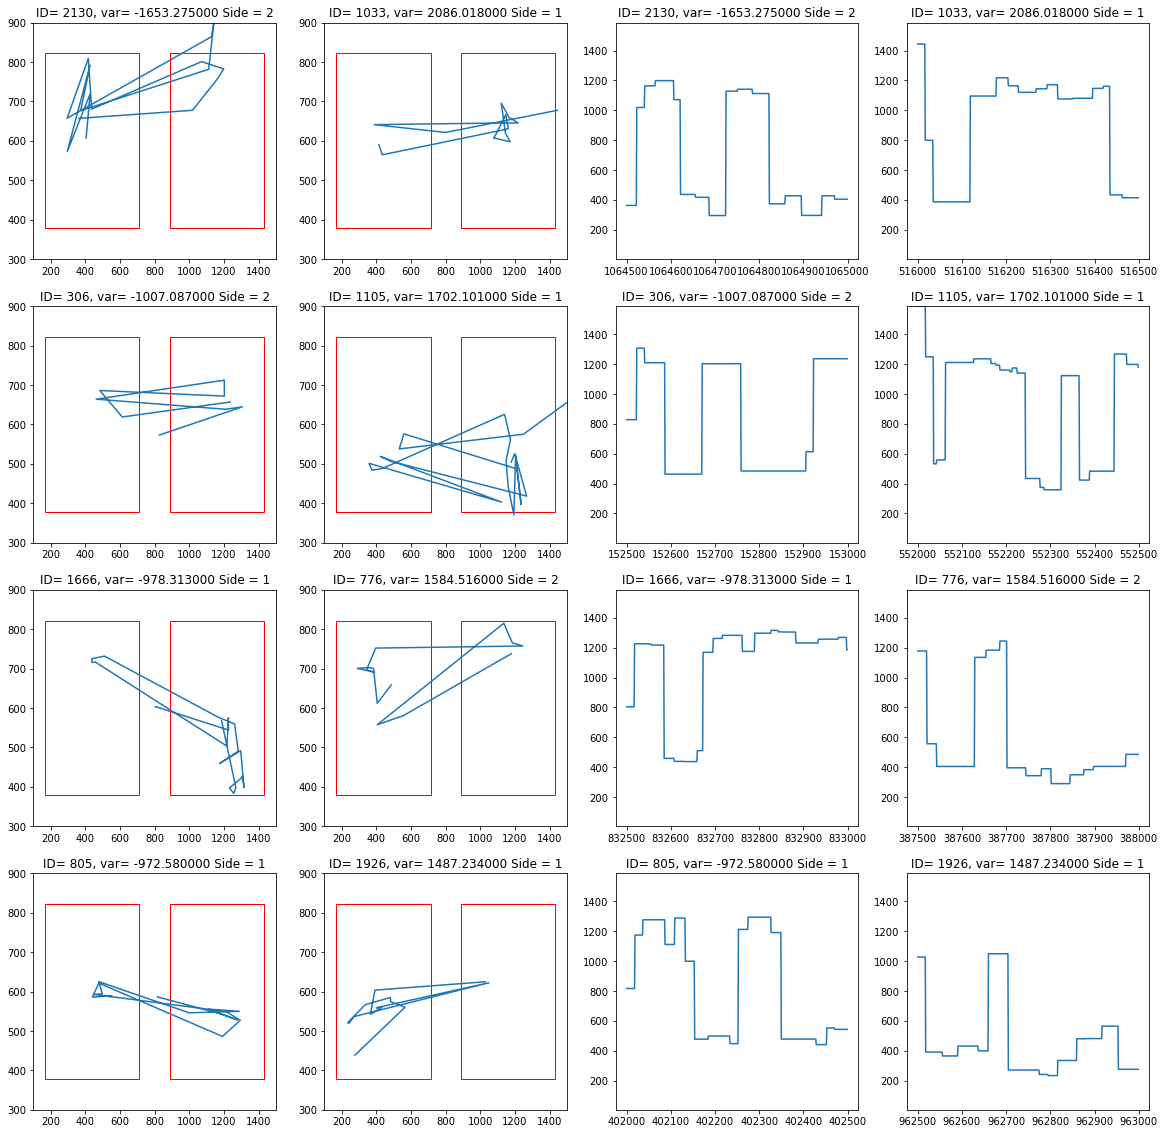

In [68]:
SHOWFEATURE('X__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"')

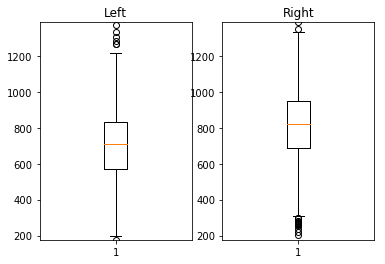

In [71]:
featureplot(features_filtered_direct,LABELS,'X__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"')

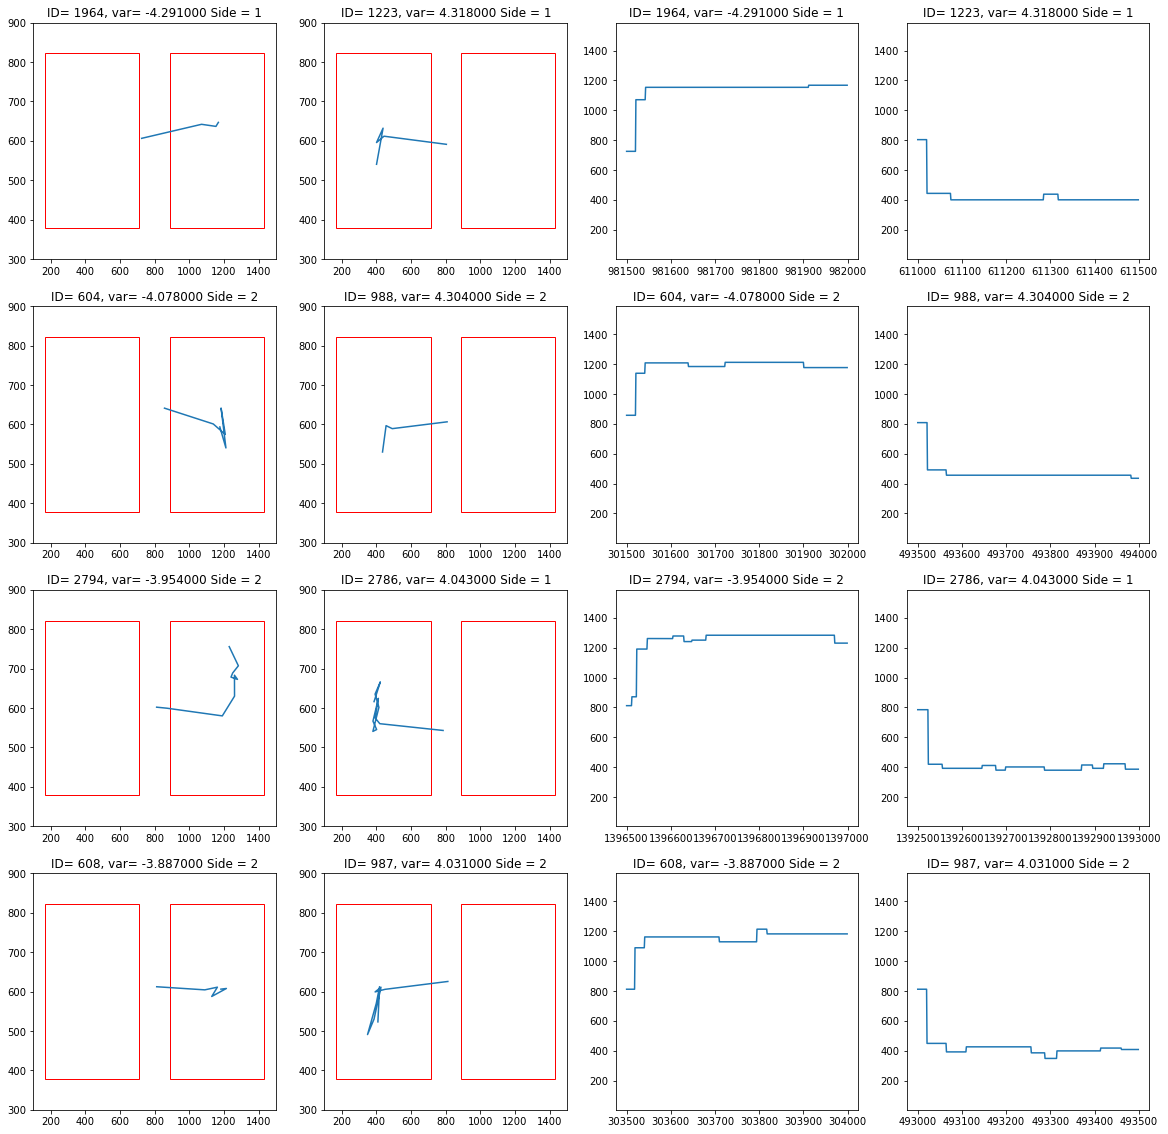

In [56]:
SHOWFEATURE('X__skewness')

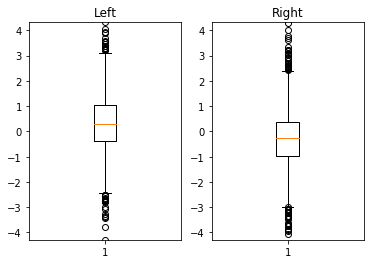

In [72]:
featureplot(features_filtered_direct,LABELS,'X__skewness')

Since we were over-fitting, create a new feature matrix using the top k features.

In [77]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])


top_k=indices_of_top_k(cl.feature_importances_,40)

toplabels=np.array(attributes)[top_k]

topkmat=np.array(scaled)[:,top_k]


X_train, X_test, y_train, y_test = train_test_split(topkmat, LABELSPREP, test_size=.2)

from sklearn.ensemble import RandomForestClassifier

cl2 = RandomForestClassifier()
cl2.fit(X_train, y_train)

scoreCV2=cross_val_score(cl2,X_train,y_train,cv=10,scoring='accuracy')

In [78]:
scoreCV2

array([ 0.64102564,  0.64957265,  0.67094017,  0.64957265,  0.61111111,
        0.64957265,  0.59913793,  0.61206897,  0.63793103,  0.63362069])

Perform a grid search of hyper-parameters. (Takes a few minutes). Use the best-fitting model according to cross validation as the final model.

In [80]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 15, 30], 'max_features': [5, 10, 20, 40],'max_depth': [10,15,20],'min_samples_leaf': [15,20,30],'warm_start':[True,False]}]


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(cl2, param_grid, cv=5,scoring='accuracy')

grid_search.fit(X_train, y_train)


cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.62349914236706694, {'max_features': 5, 'n_estimators': 3, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.64065180102915953, {'max_features': 5, 'n_estimators': 3, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.65651801029159518, {'max_features': 5, 'n_estimators': 10, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.64365351629502576, {'max_features': 5, 'n_estimators': 10, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.65180102915951976, {'max_features': 5, 'n_estimators': 15, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.65523156089193824, {'max_features': 5, 'n_estimators': 15, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.65823327615780447, {'max_features': 5, 'n_estimators': 30, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.65137221269296741, {'max_features': 5, 'n_estimators': 30, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.632

In [81]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

             precision    recall  f1-score   support

          1       0.69      0.69      0.69       280
          2       0.71      0.71      0.71       304

avg / total       0.70      0.70      0.70       584



Looks like we can get to 70% classification of the test data based on 20 features of the timeseries.

Now plot the feature matrices for the intact and scrambled data.

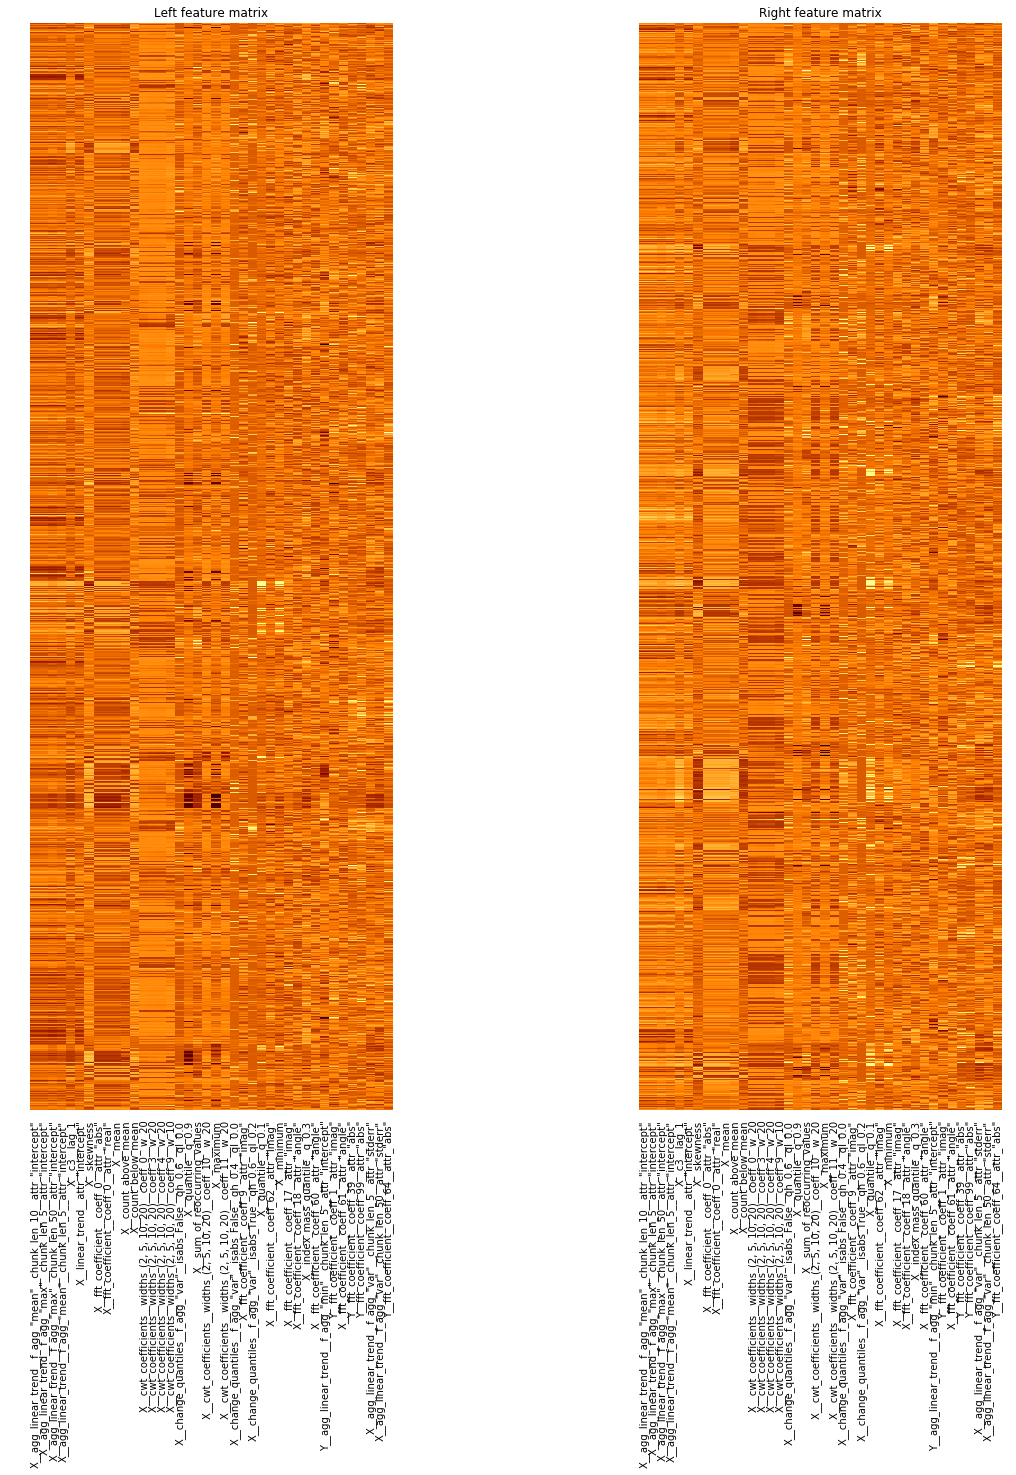

In [79]:
scaledwithlabs=np.concatenate((topkmat,np.array(pd.DataFrame(LABELS))),axis=1)
scaledint=scaledwithlabs[np.where(scaledwithlabs[:,-1] == 1)]
scaledsc=scaledwithlabs[np.where(scaledwithlabs[:,-1] == 2)]
from matplotlib import cm, colors
fig, ax = plt.subplots(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(scaledint[:,0:-1],cmap='afmhot',vmin=topkmat.min(), vmax=topkmat.max(),extent=[0, 1, 0, 3])
plt.title("Left feature matrix")
coords=np.linspace(start=0, stop=0.975, num=topkmat.shape[1])
for i in range(topkmat.shape[1]):
    plt.text(coords[i],-0.05,toplabels[i],rotation=90)
plt.axis('off')
plt.grid(which='minor', axis='y', linewidth=10)
plt.subplot(1, 2, 2)
plt.imshow(scaledsc[:,0:-1],cmap='afmhot',vmin=topkmat.min(), vmax=topkmat.max(),extent=[0, 1, 0, 3])
plt.title("Right feature matrix")
plt.axis('off')
for i in range(topkmat.shape[1]):
    plt.text(coords[i],-0.05,toplabels[i],rotation=90)

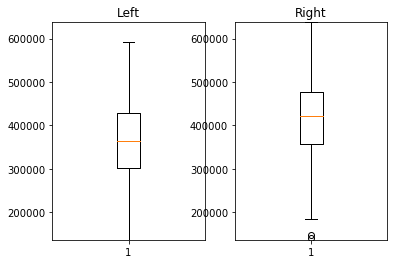

In [59]:
featureplot(features_filtered_direct,LABELS,'X__fft_coefficient__coeff_0__attr_"real"')

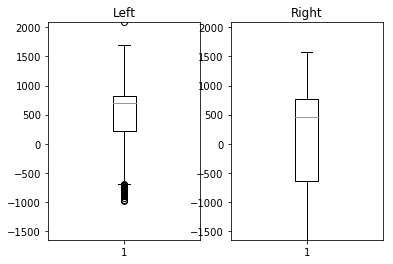

In [60]:
featureplot(features_filtered_direct,LABELS,'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20')

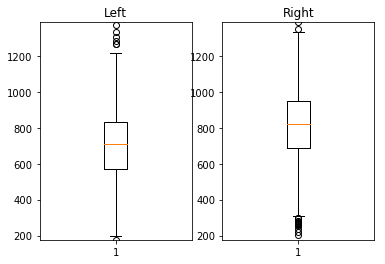

In [62]:
featureplot(features_filtered_direct,LABELS,'X__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"')

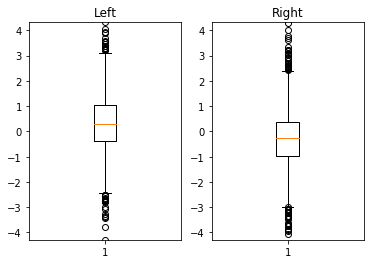

In [63]:
featureplot(features_filtered_direct,LABELS,'X__skewness')

In [75]:
scaled

array([[-1.44586302, -1.60188488, -1.46513272, ..., -1.03435998,
        -0.48212433,  1.10391485],
       [-2.03375575, -2.20683712, -2.11330195, ...,  1.13161689,
         0.56652721, -0.02266577],
       [-1.2870525 , -1.35306845, -1.36774022, ...,  1.66806885,
        -0.38650525,  1.25588527],
       ..., 
       [ 0.10301694,  0.02782953,  0.12883708, ..., -0.48722329,
        -0.44594396, -2.6675358 ],
       [-0.23954952, -0.0563032 , -0.20113449, ..., -0.65291377,
        -0.51098277, -0.6545358 ],
       [ 0.78963447,  0.95662336,  0.76942288, ...,  1.34073928,
        -0.92750702,  1.53233121]])

In [76]:
topkmat

array([[  445.55976471,   444.70148515,   490.26545455, ...,
           31.26453316,  3495.20113662,   183.61219332],
       [  313.48075294,   313.8090495 ,   449.64363636, ...,
           22.37023993,  3447.31134625,   162.0013069 ],
       [  465.40567059,   473.06512871,   659.70181818, ...,
           52.55501305,  5693.8141982 ,   338.06393419],
       ..., 
       [  770.36684706,   787.3290495 ,  1016.95818182, ...,
           71.26460719,  5798.72934814,   343.85956484],
       [  703.12774118,   725.50273267,  1064.84181818, ...,
           80.87734002,  3653.73040634,   257.88098029],
       [  900.90056471,   926.70742574,  1167.06727273, ...,
           60.6652425 ,  3104.78279889,   125.17662797]])